In [ ]:
# 4. Бустинг. Практика
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

In [ ]:
# Задание 4.1 - является ли письмо спамом

df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')
df.head()

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,yesno
0,1,278,0.000,0.778,0.00,0.00,0.00,y
1,2,1028,0.180,0.372,0.43,0.43,0.21,y
2,3,2259,0.184,0.276,0.06,1.16,0.06,y
3,4,191,0.000,0.137,0.00,0.00,0.00,y
4,5,191,0.000,0.135,0.00,0.00,0.00,y


In [ ]:
df.shape

(4601, 8)

In [ ]:
# Из столбца yesno сделайте столбец spam, где 1 соответствует значению y (является спамом), 
# а 0 – n (не является спамом). Удалите первый столбец (с индексом) и столбец "yesno".

# У Вас остается шесть столбцов-признаков и один столбец spam, который является нашей 
# целевой переменной. Разделим их на x и у.

# Теперь мы хотим создать новые признаки путем попарного перемножения уже имеющихся друг на друга. 
# Сколько получится признаков после преобразования (включая те шесть, которые были в исходных данных)?

In [ ]:
df['spam'] = np.where(df['yesno'] == 'y', 1, 0)
df = df.drop(['yesno'], axis=1)
df.head()

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,spam
0,1,278,0.000,0.778,0.00,0.00,0.00,1
1,2,1028,0.180,0.372,0.43,0.43,0.21,1
2,3,2259,0.184,0.276,0.06,1.16,0.06,1
3,4,191,0.000,0.137,0.00,0.00,0.00,1
4,5,191,0.000,0.135,0.00,0.00,0.00,1


In [ ]:
df.tail()

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,spam
4596,4597,88,0.0,0.000,0.0,0.0,0.31,0
4597,4598,14,0.0,0.353,0.0,0.0,0.00,0
4598,4599,118,0.0,0.000,0.0,0.0,0.30,0
4599,4600,78,0.0,0.000,0.0,0.0,0.96,0
4600,4601,40,0.0,0.125,0.0,0.0,0.00,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'crl.tot', 'dollar', 'bang', 'money', 'n000', 'make',
       'spam'],
      dtype='object')

In [ ]:
x = df.loc[:, ['crl.tot', 'dollar', 'bang', 'money', 'n000', 'make']]
y = df.loc[:, 'spam']

In [ ]:
df.head()

,Unnamed: 0,crl.tot,dollar,bang,money,n000,make,spam
0,1,278,0.000,0.778,0.00,0.00,0.00,1
1,2,1028,0.180,0.372,0.43,0.43,0.21,1
2,3,2259,0.184,0.276,0.06,1.16,0.06,1
3,4,191,0.000,0.137,0.00,0.00,0.00,1
4,5,191,0.000,0.135,0.00,0.00,0.00,1


In [ ]:
x.shape

(4601, 6)

In [ ]:
n = x.shape[1]
for i in range(n):
    for j in range(i+1, n):
        x[str(i) + '_' + str(j)] = x.iloc[:, i] * x.iloc[:, j] 

print(x.shape)
x.head()

(4601, 21)


,crl.tot,dollar,bang,money,n000,make,0_1,0_2,0_3,0_4,0_5,1_2,1_3,1_4,1_5,2_3,2_4,2_5,3_4,3_5,4_5
0,278,0.000,0.778,0.00,0.00,0.00,0.000,216.284,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
1,1028,0.180,0.372,0.43,0.43,0.21,185.040,382.416,442.04,442.04,215.88,0.066960,0.07740,0.07740,0.03780,0.15996,0.15996,0.07812,0.1849,0.0903,0.0903
2,2259,0.184,0.276,0.06,1.16,0.06,415.656,623.484,135.54,2620.44,135.54,0.050784,0.01104,0.21344,0.01104,0.01656,0.32016,0.01656,0.0696,0.0036,0.0696
3,191,0.000,0.137,0.00,0.00,0.00,0.000,26.167,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000
4,191,0.000,0.135,0.00,0.00,0.00,0.000,25.785,0.00,0.00,0.00,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.0000,0.0000


In [ ]:
# Задание 4.2

# Разделим получившиеся данные на обучающую и тестовую выборки в соотношении 80:20. 
# Обучите модель GradientBoostingClassifier (из библиотеки sklearn), используя параметры 
# «по умолчанию» (на момент создания урока это learning_rate=0.1, n_estimators=100,
# max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1, max_features=None).

# Во всех методах, где присутствует случайность, укажите random_state=42.

# Это будет наш baseline. Укажите точность на тестовой выборке (параметр score), округлив 
# до третьего знака

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
RAND_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=RAND_SEED)

In [ ]:
clf = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1,
    max_features=None,
    random_state=RAND_SEED
    ).fit(X_train, y_train)

In [ ]:
print(round(clf.score(X_test, y_test), 3))

0.865


In [ ]:
# Задание 4.3

# Воспользуйтесь методом feature_importances_. 
# С его помощью можно оценить вклад каждого признака в обучение модели. Постройте столбчатую 
# диаграмму так, чтобы по горизонтали были указаны названия признаков, а по вертикали их важность. 
# В ответе укажите третий по важности признак (без кавычек и пробелов).

In [ ]:
clf.feature_importances_

array([0.02971594, 0.1407699 , 0.04257207, 0.0060902 , 0.02477733,
       0.00116643, 0.00867922, 0.61487739, 0.04024476, 0.00136582,
       0.00653882, 0.06056658, 0.00722154, 0.003422  , 0.00169411,
       0.00646902, 0.00117577, 0.00196527, 0.00002655, 0.        ,
       0.0006613 ])

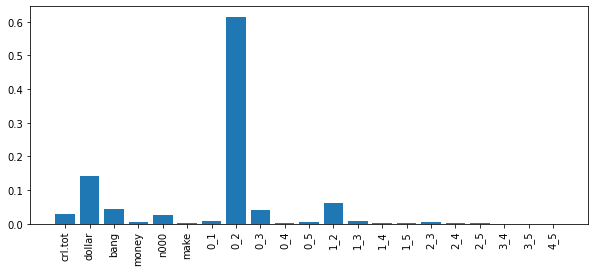

In [ ]:
fig, ax = plt.subplots(figsize = (10,4))
idx = np.asarray([i for i in range(len(clf.feature_importances_))])
ax.set_xticks(idx)
ax.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
ax.set_xticklabels(X_train.columns, rotation=90)

plt.show()

In [ ]:
# Задание 4.4

# Теперь перейдем к подбору параметров в модели. Для этого в библиотеке scikit-learn есть метод 
# GridSearchCV. Ему на вход подается модель, список параметров и способ оценивания. 
# При запуске метода fit модель обучается со всеми возможными комбинациями параметров, 
# лучшей комбинацией параметров становится та, при которой значение метрики максимально.

# Укажите в качестве estimator градиетный бустинг с параметрами «по умолчанию» 
# и random_state=42. В параметре scoring укажите 'accuracy', n_jobs=-1, cv=5.

# Сетку параметров задайте такой:

# param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
#               'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}
# В ответе укажите точность лучшей комбинации параметров, округленную до трёх знаков

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
    'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750]
    }
clf = GradientBoostingClassifier(random_state=RAND_SEED)

gscv = GridSearchCV(
    clf,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5).fit(X_train, y_train)

In [ ]:
round(gscv.score(X_test, y_test), 3)
# не подошло

0.864

In [ ]:
# Задание 4.5

# Подбор параметров — незаменимый инструмент при настройке моделей. Однако, если данных очень 
# много, а модель сложная, то иногда имеет смысл ограничить количество параметров, которые 
# вы хотите перебрать. Если модель с одним набором параметров обучается 30 минут, а вы хотите 
# перебрать 10 таких наборов, то стоит приготовиться к пятичасовому ожиданию. Также стоит 
# учитывать, что размер некоторых параметров влияет на время, потраченное на обучение моделей. 
# Например, менее глубокие деревья учатся быстрее, чем более глубокие.

# При использовании GridSearchCV перебираются все возможные способы комбинации параметров. 
# Сколько разных моделей (моделей градиентного бустинга с разными наборами параметров) 
# обучилось в прошлом задании?

In [ ]:
# Задание 4.6

# Теперь воспользуемся GridSearchCV для подбора максимальной глубины (max_depth). 
# В качестве estimator используйте градиентный бустинг с ранее подобранными параметрами 
# и random_state=42. Переберите все значения max_depth от 5 до 15 включительно. 
# В ответ запишите значение параметра, при котором точность максимальна.

param_grid = {'max_depth': [i for i in range(5, 16)]}

gscv = GridSearchCV(
    clf,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5).fit(X_train, y_train)

In [ ]:
gscv.best_params_

{'max_depth': 5}

In [ ]:
def AdaBoost_scratch(X,y, M=10, learning_rate =1):
	# инициалиазция служебных переменных
	N = len(y)
	estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]
	
	# инициализация весов
	sample_weight = np.ones(N) / N
	sample_weight_list.append(sample_weight.copy())
	
	# цикл по длине М
	for m in range(M):

		# обучим базовую модель и получим предсказание
		estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
		estimator.fit(X, y, sample_weight=sample_weight)
		y_predict = estimator.predict(X)
		
		# Маска для ошибок классификации
		incorrect = (y_predict != y)
		
		# Оцениваем ошибку
		#estimator_error = TODO 
		
		# Вычисляем вес нового алгоритма
		#estimator_weight =  TODO
	
		sample_weight *= np.exp(estimator_weight * incorrect * > 0) | (estimator_weight < 0)

		# Сохраяем результаты данной итерации
		estimator_list.append(estimator)
		y_predict_list.append(y_predict.copy())
		estimator_error_list.append(estimator_error.copy())
		estimator_weight_list.append(estimator_weight.copy())
		sample_weight_list.append(sample_weight.copy())

	# Для удобства переведем в numpy.array
	estimator_list = np.asarray(estimator_list)
	y_predict_list = np.asarray(y_predict_list)
	estimator_error_list = np.asarray(estimator_error_list)
	estimator_weight_list = np.asarray(estimator_weight_list)
	sample_weight_list = np.asarray(sample_weight_list)

	# Получим предсказания
	
	preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
	print('Accuracy = ', accuracy_score(preds, y))

	return estimator_list, estimator_weight_list, sample_weight_list
y = y.replace({0:-1})
estimator_list, estimator_weight_list, sample_weight_list = AdaBoost_scratch(X_new, y, M=10, learning_rate=0.001)